In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [4]:
df.shape

(42000, 785)

In [5]:
df.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
22083,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3008,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15677,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41395,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13337,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
14613,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


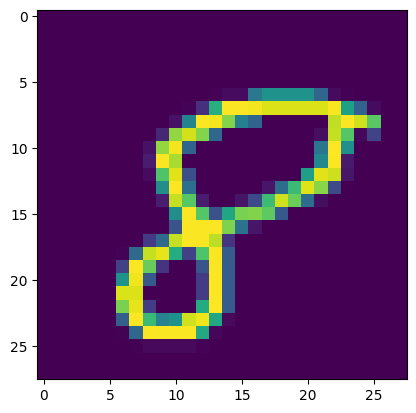

In [7]:
plt.imshow(df.iloc[40794, 1:].values.reshape(28,28))

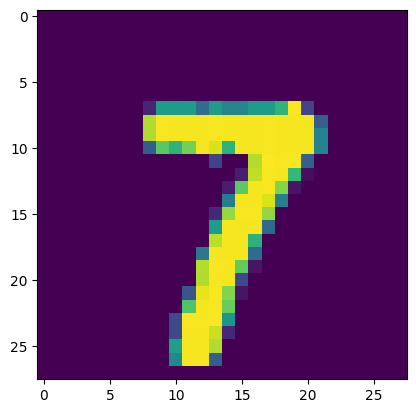

In [8]:
plt.imshow(df.iloc[18968, 1:].values.reshape(28, 28))

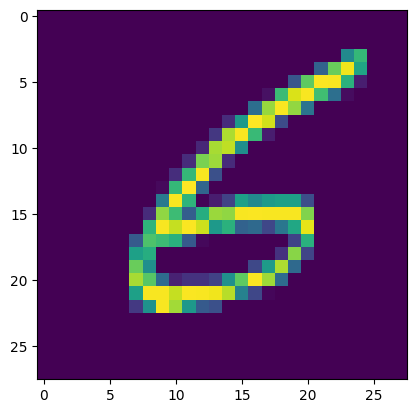

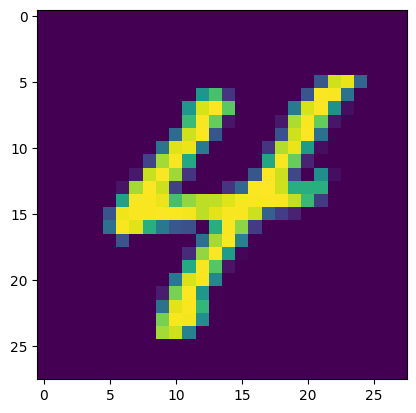

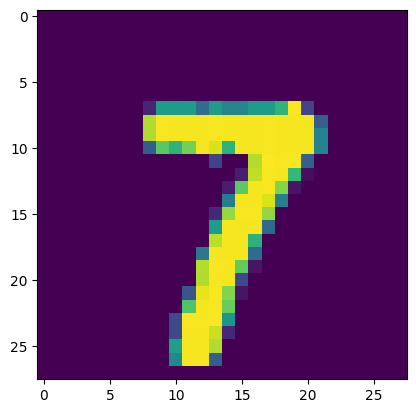

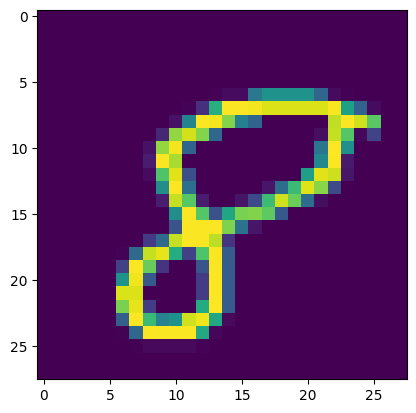

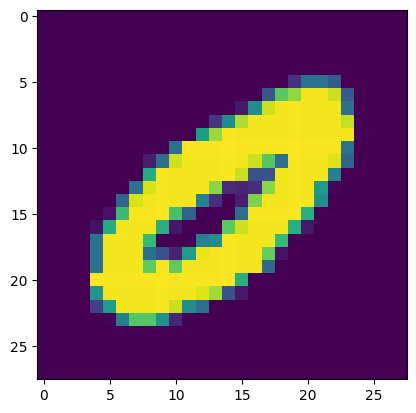

In [9]:
num_list = [4106, 4868, 18968, 40794, 32044]

for i in num_list:
    plt.imshow(df.iloc[i, 1:].values.reshape(28, 28))
    plt.show()

In [10]:
X = df.drop('label', axis = 1)
y = df['label']

In [11]:
print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(X_train.shape)
print(y_test.shape)

(33600, 784)
(8400,)


In [14]:
knn = KNeighborsClassifier()

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [16]:
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

13.188095092773438


In [17]:
y_pred.shape

(8400,)

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(33600, 784)
(8400, 784)


In [21]:
pca = PCA(n_components = 200)
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

In [22]:
print(X_train_trf.shape)
print(X_test_trf.shape)

(33600, 200)
(8400, 200)


In [23]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [24]:
y_pred = knn.predict(X_test_trf)
y_pred.shape

(8400,)

In [25]:
print("y_test shape:", len(y_test))
print("y_pred shape:", len(y_pred))

y_test shape: 8400
y_pred shape: 8400


In [26]:
accuracy_score(y_true = y_test, y_pred = y_pred)

0.9502380952380952

In [27]:
df.shape[-1]

785

In [29]:
results = []
start = time.time()
for i in tqdm(range(1,10)):
    pca = PCA(n_components = 1)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    knn.fit(X_train_trf, y_train)
    y_pred_loop = knn.predict(X_test_trf)
    acc = accuracy_score(y_test,y_pred_loop)
    results.append({
        'components': i,
        'accuracy_score': acc
    })
print(time.time() - start)

100%|██████████| 9/9 [00:11<00:00,  1.23s/it]

11.116762638092041


In [30]:
accuracy_score_df = pd.DataFrame(results)
accuracy_score_df.sample(5)

,components,accuracy_score
2,3,0.272738
0,1,0.272143
4,5,0.273690
7,8,0.274405
3,4,0.272619


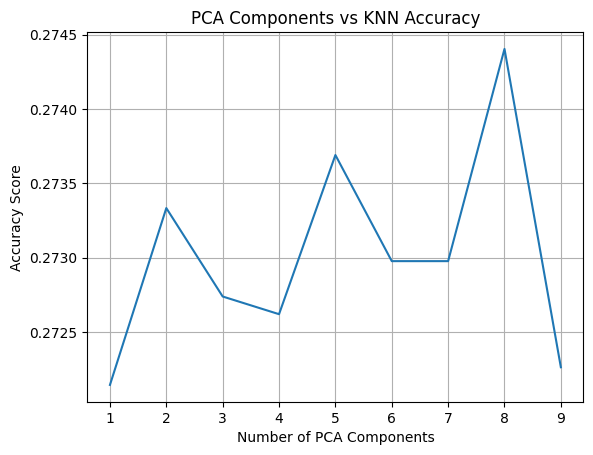

In [31]:
plt.plot(accuracy_score_df['components'], accuracy_score_df['accuracy_score'])
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy Score')
plt.title('PCA Components vs KNN Accuracy')
plt.grid(True)
plt.show()

In [32]:
# Change the parameters into 2
# So we got only two Principle components
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

In [33]:
print(X_train_trf.shape)
print(X_test_trf.shape)

(33600, 2)
(8400, 2)


In [34]:
X_train_trf

array([[-2.71862573, -0.49000618],
       [-0.67702961, -6.75329876],
       [-3.03331885,  6.51074548],
       ...,
       [ 2.14880902,  0.78103891],
       [ 1.05956699,  0.94763016],
       [17.70250871,  1.96265877]])

In [35]:
# Plot the points see the graph
y_train_trf = y_train.astype(str)

fig = px.scatter(
    x= X_train_trf[:, 0],
    y= X_train_trf[:, 1],
    color=y_train_trf,
    
)

fig.show(renderer='iframe')

In [36]:
# first make components  3

pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

In [37]:
X_train_trf

array([[-2.71863166, -0.48971872,  1.13557243],
       [-0.67699234, -6.75389764, -2.33629836],
       [-3.0331849 ,  6.51053133,  7.49232416],
       ...,
       [ 2.14884096,  0.78050937, -0.74718726],
       [ 1.05954627,  0.94774504,  3.94980105],
       [17.70254687,  1.96187552, -4.94367502]])

In [38]:
print(X_train_trf.shape)
print(X_test_trf.shape)

(33600, 3)
(8400, 3)


In [39]:
df.shape

(42000, 785)

In [40]:
# Convert y_train to string for color labels
y_train_str = y_train.astype(str)

# Create DataFrame for Plotly
df_plot = pd.DataFrame({
    'PC1': X_train_trf[:, 0],
    'PC2': X_train_trf[:, 1],
    'PC3': X_train_trf[:, 2],
    'Label': y_train_str
})

In [41]:
# Plotting
fig = px.scatter_3d(
    df_plot,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Label',
    title='3D PCA Scatter Plot (Train Set)',
    labels={'PC1': 'Principal Component 1', 
            'PC2': 'Principal Component 2', 
            'PC3': 'Principal Component 3'}
)

fig.update_traces(marker=dict(size=5))
fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))
fig.show(renderer='iframe')

In [42]:
pca.components_

array([[ 5.44971589e-19, -7.21800258e-19,  9.89429016e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 7.25351367e-17, -8.26801544e-19,  6.01822831e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 7.52266509e-17,  2.10007131e-17, -1.10082727e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [43]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [44]:
# Eigen Values
pca.explained_variance_

array([40.67111198, 29.17023383, 26.74459615])

In [45]:
# Eigen Vectors
pca.components_.shape

(3, 784)

In [46]:
df.shape[-1]

785

In [47]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

In [48]:
print(X_test_trf.shape)
print(X_train_scaled.shape)

(8400, 784)
(33600, 784)


In [49]:
pca.explained_variance_.shape

(784,)

In [50]:
pca.components_.shape

(784, 784)

In [51]:
# How much each component contains in terms of %
# Just like PC1-> 5.78% , PC2-> 4.12% .... 
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [52]:
# This add all one by one
variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
variance_ratio_cumsum

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

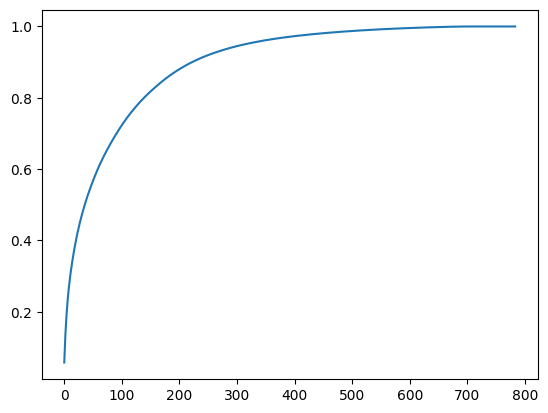

In [53]:
plt.plot(variance_ratio_cumsum)

In [54]:
fig = px.line(
    x= variance_ratio_cumsum,
    labels={'x': 'Number of Components', 'y': 'Cumulative Explained Variance'},
    title='Explained Variance by PCA Components',
    width= 700,
    
)

fig.update_layout(yaxis=dict(autorange='reversed'))

fig.show(renderer='iframe')